In [3]:
# Import libraries
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras import optimizers
from keras import callbacks

# sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plots
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# read data
IMAGE_PATH = "/content/drive/My Drive/canine_images/"
LABEL_PATH = "/content/drive/My Drive/canine_labels.csv"

In [6]:
LABEL_PATH = "/content/drive/My Drive/canine_labels.csv"
labels = pd.read_csv(LABEL_PATH)

print('Shape of labels:', labels.shape)
print('Unique VHS codes:', np.sort(labels.diagnosis.unique()))
labels.head()

Shape of labels: (153, 2)
Unique VHS codes: [0 1 2 3]


,id_code,diagnosis
0,img_001.png,1
1,img_002.png,2
2,img_003.png,0
3,img_004.png,0
4,img_005.png,0


There are 153 training images corrresponding to 4 different VHS codes:

* Normal (0)
* Mild (1)
* Moderate (2)
* Severe (3)


In [7]:
images = []

for idx, img in enumerate(os.listdir(IMAGE_PATH)):
    img = load_img(
    IMAGE_PATH + img)
    images.append(img)

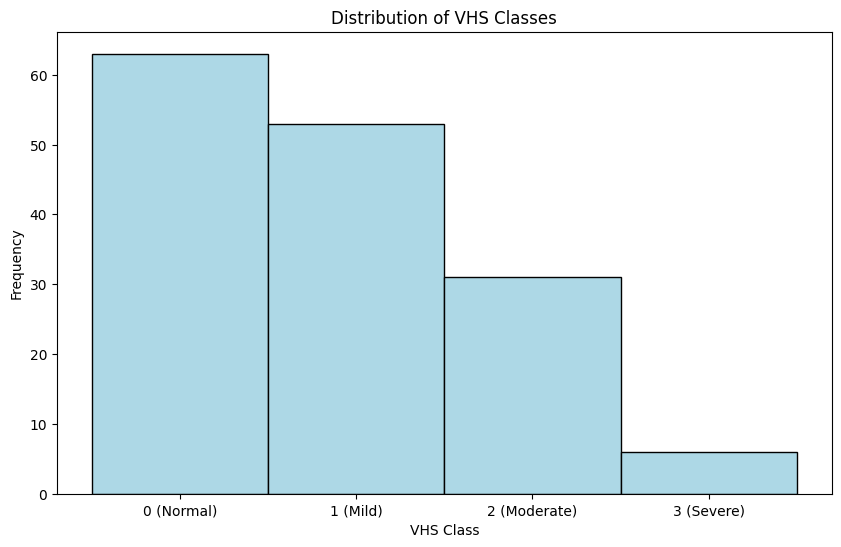

In [10]:
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(labels['diagnosis'], bins=4, edgecolor='black', align='mid', color='lightblue')
plt.title('Distribution of VHS Classes')
plt.xlabel('VHS Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0.375, 1.125, 1.875, 2.625], labels=['0 (Normal)', '1 (Mild)', '2 (Moderate)', '3 (Severe)'])
plt.grid(False)
plt.show()

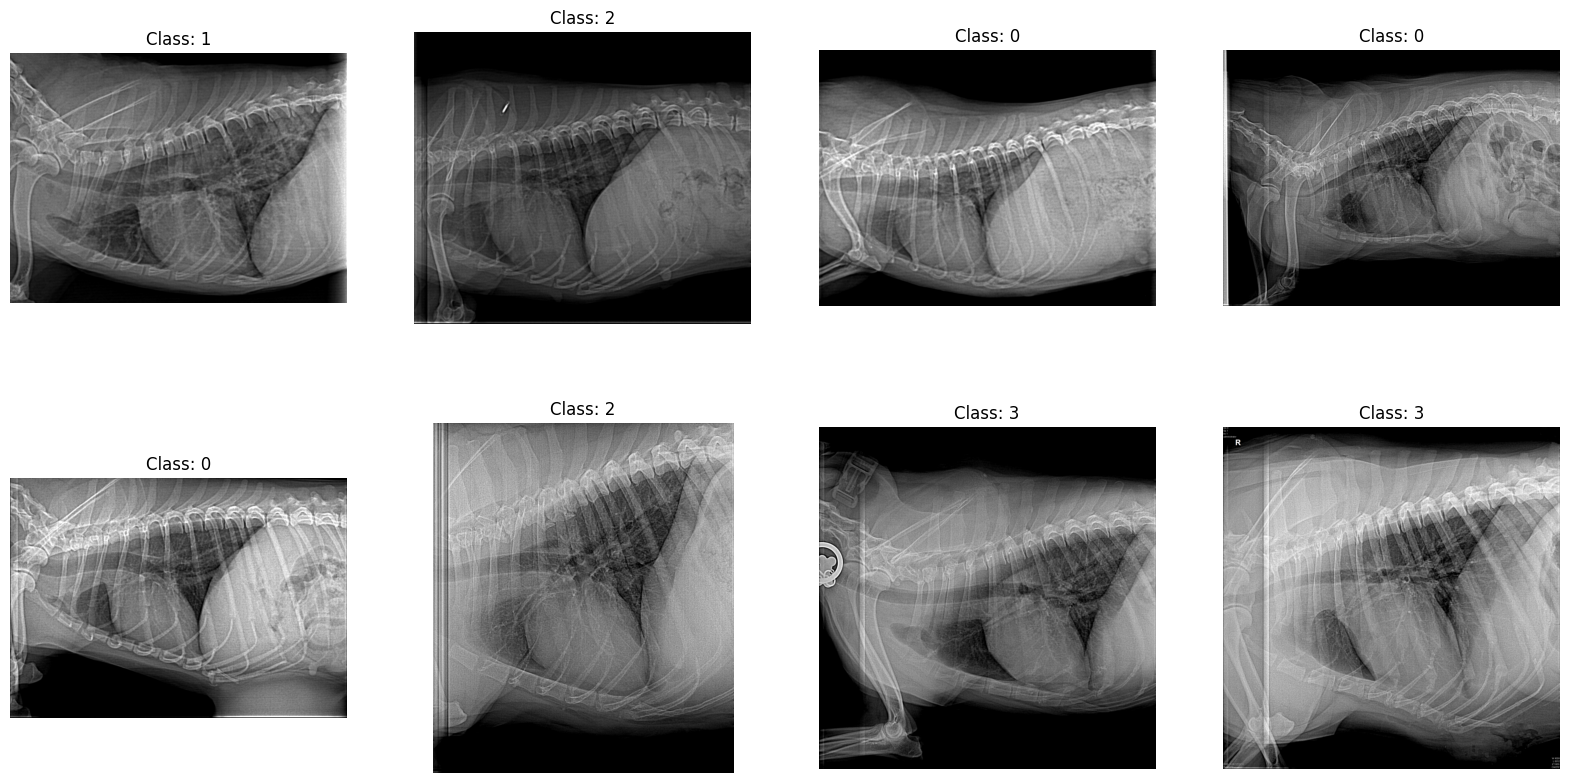

In [11]:
# Define function
def plot_images(images, labels, num_images=8):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        ax = plt.subplot(2, 4, i + 1)
        img_array = np.array(images[i])
        plt.imshow(img_array.astype('uint8'))
        plt.title(f"Class: {labels['diagnosis'][i]}")
        plt.axis("off")
    plt.show()

# Print 8 images from the data
plot_images(images, labels)

In [12]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

np.random.seed(1234)

# Create boolean masks to separate the classes
no_refer = labels[labels.diagnosis.isin([0, 1])]
refer = labels[labels.diagnosis.isin([2, 3])]

# Randomly draw images from each class
temp_no_refer = no_refer.sample(n=5, replace=False, random_state=1234).id_code.tolist()
temp_refer = refer.sample(n=5, replace=False, random_state=1234).id_code.tolist()

print("Sampled no_refer filenames:", temp_no_refer)
print("Sampled refer filenames:", temp_refer)

Sampled no_refer filenames: ['img_038.png', 'img_152.png', 'img_140.png', 'img_012.png', 'img_132.png']
Sampled refer filenames: ['img_018.png', 'img_142.png', 'img_032.png', 'img_006.png', 'img_009.png']


In [13]:
def preprocess_data_part1(IMAGE_PATH, LABEL_PATH, temp_no_refer, temp_refer):
    """
    Generate lists of images and labels based on temp_no_refer and temp_refer lists

    Params:
    IMAGE_PATH (str): path to directory with images.
    LABEL_PATH (str): path to directory with labels.
    temp_no_refer (list): list of labels for the no refer category
    temp_refer (list): list of labels for the refer category

    Returns:
    -------
    images_mini (np.ndarray): Images of shape (N, 224, 224, 3)
    y_mini (np.ndarray): Labels of shape (N,)
    """
    images_mini = []
    y_mini = []

    # List all files in the image directory
    all_files = os.listdir(IMAGE_PATH)
    print("Files in directory:", all_files)

    # Create lists of images and labels 'images_mini' and 'y_mini'
    # based on temp_no_refer and temp_refer selections
    for idx, img in enumerate(all_files):
        # No need to strip file extension, compare directly with elements in temp lists
        print(f"Processing file: {img}")
        if img in temp_no_refer:
            y_mini.append(0)
        elif img in temp_refer:
            y_mini.append(1)
        else:
            continue

        # Read image
        img_path = os.path.join(IMAGE_PATH, img)
        img = load_img(img_path, target_size=(224, 224))
        # Transform image to array
        img = img_to_array(img)
        # Append to images_mini
        images_mini.append(img)

    if len(images_mini) > 0:
        # Stack images and transform to array
        images_mini = np.stack(images_mini)
        y_mini = np.array(y_mini).flatten()
    else:
        raise ValueError("No images found. Please check the input paths and conditions.")

    return images_mini, y_mini

In [14]:
# Generate images and labels based on preprocess_data_part1() function
IMAGE_PATH = "/content/drive/My Drive/canine_images/"
LABEL_PATH = "/content/drive/My Drive/canine_labels.csv"

images_mini, y_mini = preprocess_data_part1(IMAGE_PATH, LABEL_PATH, temp_no_refer, temp_refer)

print(f"images_mini shape {images_mini.shape}")
print(f"y_mini shape {y_mini.shape}")

Files in directory: ['img_090.png', 'img_068.png', 'img_003.png', 'img_078.png', 'img_017.png', 'img_061.png', 'img_116.png', 'img_135.png', 'img_044.png', 'img_099.png', 'img_050.png', 'img_004.png', 'img_063.png', 'img_148.jpg', 'img_031.png', 'img_133.png', 'img_019.png', 'img_130.png', 'img_054.png', 'img_111.png', 'img_016.png', 'img_089.png', 'img_038.png', 'img_098.png', 'img_095.png', 'img_065.png', 'img_071.png', 'img_018.png', 'img_110.png', 'img_113.png', 'img_086.png', 'img_104.png', 'img_051.png', 'img_087.png', 'img_055.png', 'img_131.png', 'img_108.png', 'img_053.png', 'img_041.png', 'img_123.png', 'img_025.png', 'img_037.png', 'img_124.png', 'img_048.png', 'img_127.png', 'img_142.jpg', 'img_101.png', 'img_006.png', 'img_074.png', 'img_021.png', 'img_093.png', 'img_088.png', 'img_117.png', 'img_023.png', 'img_107.png', 'img_100.png', 'img_144.png', 'img_045.png', 'img_039.png', 'img_146.jpg', 'img_046.png', 'img_013.png', 'img_137.png', 'img_024.png', 'img_057.png', 'img

In [15]:
from sklearn.model_selection import train_test_split

def preprocess_data_part2(images, labels, splits):
    """ Split data into train, validation and test sets; apply transformaions and augmentations

    Params:
    -------
    images  (np.ndarray): Images of shape (N, 224, 224, 3)
    labels (np.ndarray): Labels of shape (N,)
    splits (tuple): 3 values summing to 1 defining split of train, validation and test sets

    Returns:
    --------
    X_train (np.ndarray): Train images of shape (N_train, 224, 224, 3)
    y_train (np.ndarray): Train labels of shape (N_train,)
    X_val (np.ndarray): Val images of shape (N_val, 224, 224, 3)
    y_val (np.ndarray): Val labels of shape (N_val,)
    X_test (np.ndarray): Test images of shape (N_test, 224, 224, 3)
    y_test (np.ndarray): Test labels of shape (N_test,)

    """

    # Re-shuffle the data.
    tf.random.set_seed(1234)
    np.random.seed(1234)

    # Shuffle data
    shuffled_indices = np.random.permutation(len(images))
    images = images[shuffled_indices]
    labels = labels[shuffled_indices]

    # create data splits (training, val, and test sets)
    train_ratio, val_ratio, test_ratio = splits
    X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=(val_ratio + test_ratio), random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

    # image augmentation (random flip) on training data
    datagen = ImageDataGenerator(horizontal_flip=True)
    datagen.fit(X_train)
    X_train_augm = np.array([datagen.random_transform(img) for img in X_train])

    # concatenate original X_train and augmented X_train_augm data
    X_train = np.concatenate([X_train, X_train_augm], axis=0)
    y_train = np.concatenate([y_train, y_train], axis=0)

    # concatenate y_train (note the label is preserved)
    y_train_augm = y_train
    y_train = tf.concat([y_train, y_train_augm],axis=0)

    # shuffle X_train and y_train, i.e., shuffle two tensors in the same order
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
    X_train = tf.gather(X_train, shuffle).numpy() # transform X back to numpy array instead of tensor
    y_train = tf.gather(y_train, shuffle).numpy() # transform y back to numpy array instead of tensor

    # rescale training, val, and test images by dividing each pixel by 255.0
    X_train = X_train / 255.0
    X_val = X_val / 255.0
    X_test = X_test / 255.0

    return X_train, y_train, X_val, y_val, X_test, y_test

In [16]:
# define splits
split = (0.6, 0.2, 0.2)

X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_part2(
    images_mini,
    y_mini,
    split
)

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (8, 224, 224, 3)
y_train shape (8,)
X_val shape (2, 224, 224, 3)
y_val shape (2,)
X_test shape (2, 224, 224, 3)
y_test shape (2,)


In [17]:
# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='accuracy',
verbose=1,
patience=4,
mode='max',
restore_best_weights=True)

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

tf.random.set_seed(1234)
np.random.seed(1234)

# initialize model
model1 = tf.keras.Sequential()

# add convolutional layer to model1
model1.add(Conv2D(filters=12, kernel_size=(4, 4), strides=(1, 1), padding='same', data_format='channels_last', name='conv_1', activation='relu', input_shape=(224, 224, 3)))

# add max pooling layer to model1
model1.add(MaxPooling2D(pool_size=(2, 2)))

# add dropout layer to model1
model1.add(Dropout(rate=0.3))

# add a flattening layer to model1
model1.add(Flatten())

# add the classification layer to model1
model1.add(Dense(1, activation='sigmoid'))

# build and compile model1
model1.build(input_shape=(None, 224, 224, 3))
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# print model1 summary
model1.summary()

# train model1 on (X_train, y_train) data
history = model1.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])

# evaluate the accuracy of model1 on (X_train, y_train) and (X_val, y_val)
train_loss, train_acc = model1.evaluate(X_train, y_train)
val_loss, val_acc = model1.evaluate(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                      │ (None, 224, 224, 12)        │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 12)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 12)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         150,529 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,117 (590.30 KB)

 Trainable params: 151,117 (590.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.6221 - val_accuracy: 0.0000e+00 - val_loss: 6742.7324
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - accuracy: 0.7500 - loss: 1773.0337 - val_accuracy: 0.0000e+00 - val_loss: 715.6140
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.7500 - loss: 133.5995 - val_accuracy: 1.0000 - val_loss: 4.8177e-11
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - accuracy: 0.2500 - loss: 24.1237 - val_accuracy: 0.0000e+00 - val_loss: 705.4181
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.7500 - loss: 237.2503 - val_accuracy: 0.0000e+00 - val_loss: 102.8195
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.7500 - loss: 1760.9525
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0000e+00 - loss: 6742.7324


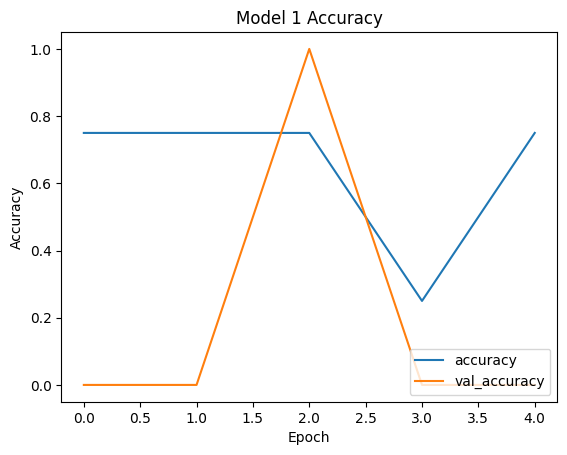

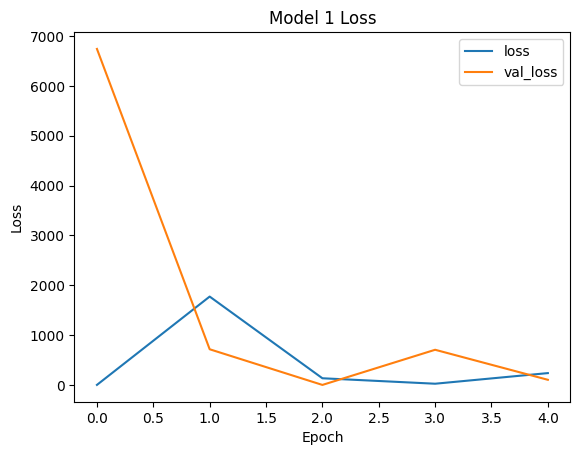

In [19]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model 1 Accuracy')
plt.savefig('model1_accuracy.png')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model 1 Loss')
plt.savefig('model1_loss.png')
plt.show()


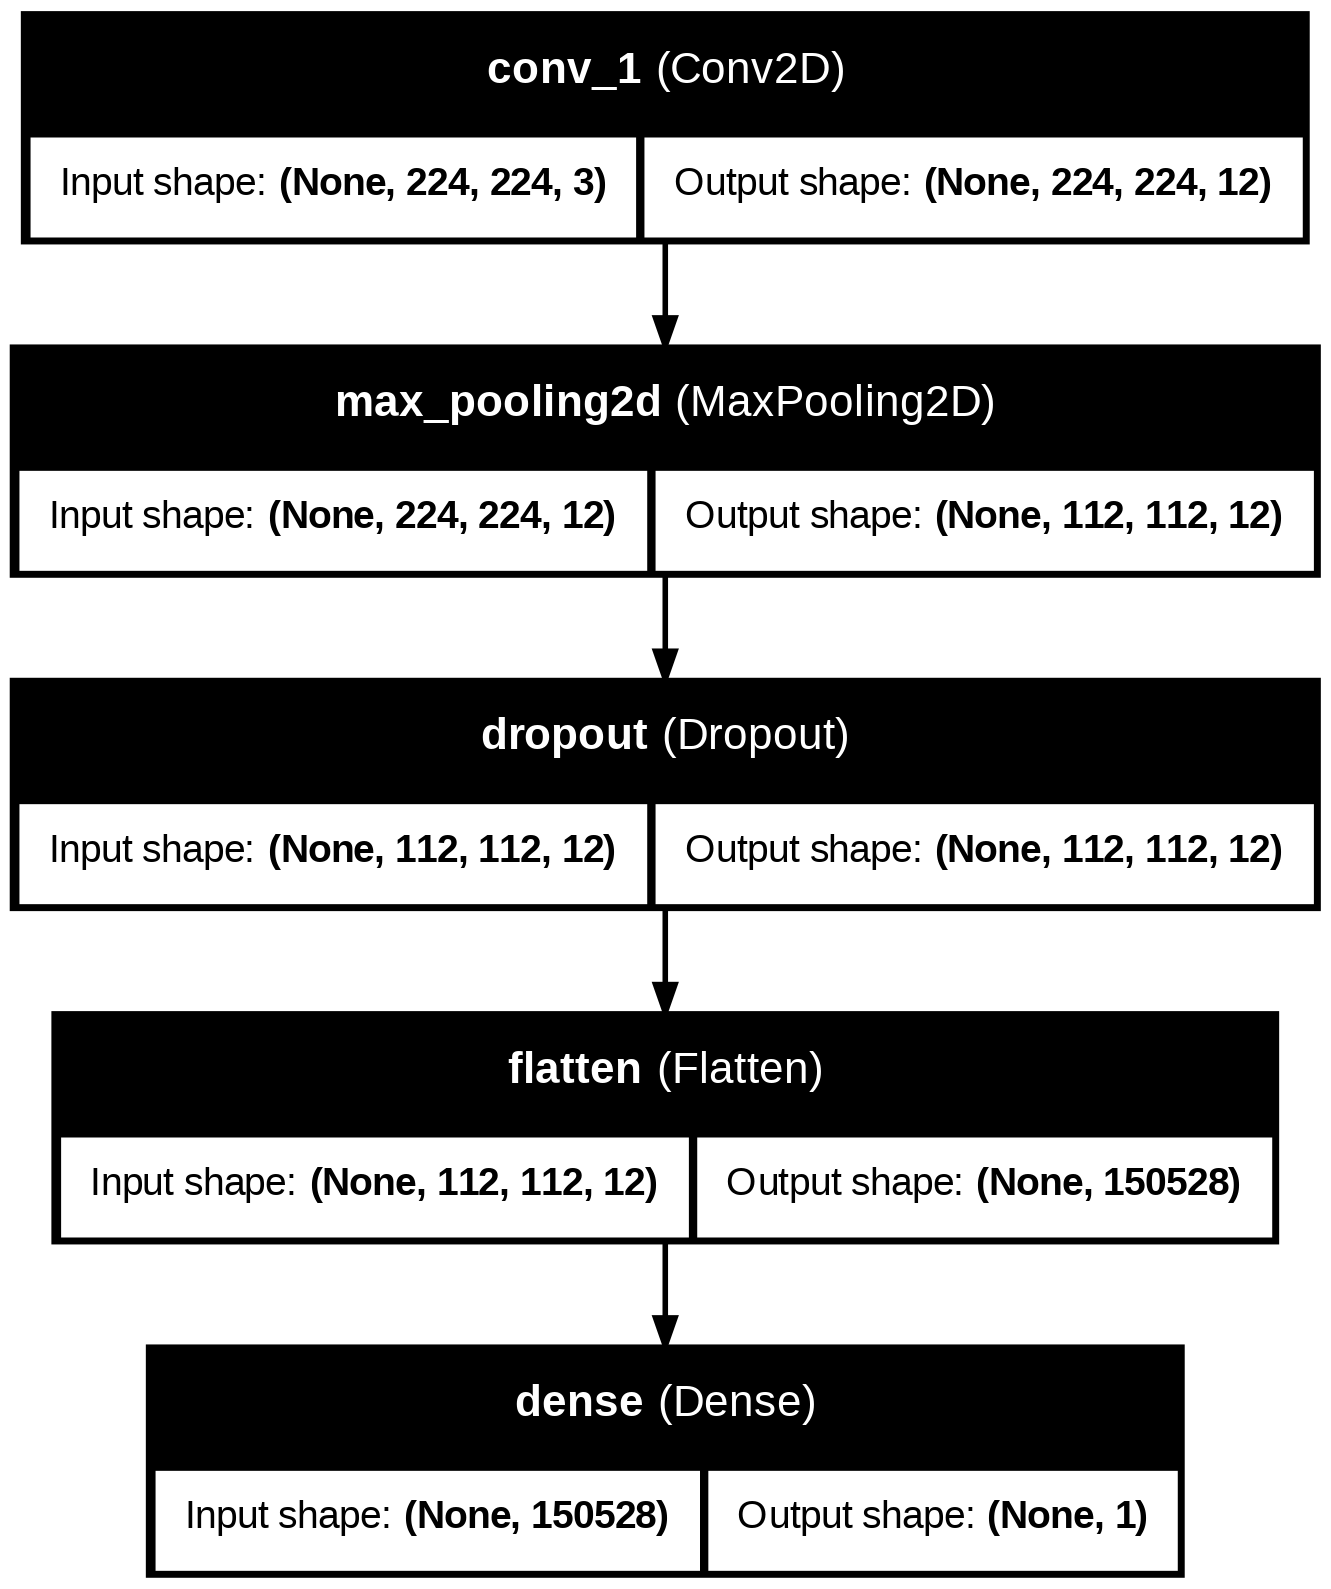

In [22]:
!pip install pydot
!pip install graphviz
from tensorflow.keras.utils import plot_model

# plot model1
plot_model(model1, to_file='model1_architecture.png', show_shapes=True, show_layer_names=True)

In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='accuracy',
verbose=1,
patience=4,
mode='max',
restore_best_weights=True)

# set random seed
tf.random.set_seed(1234)
np.random.seed(1234)

# initialize model
model2 = Sequential()

# add convolutional layers to model2
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

# add a flattening layer to model2
model2.add(Flatten())

# add a dense and dropout layers to model2
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

# add an output layer to model2
model2.add(Dense(1, activation='sigmoid'))

# build and compile model2
model2.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

# print model2 summary
model2.summary()

# train model2 on (X_train, y_train) data
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])

# evaluate the accuracy of model2 on (X_train, y_train) and (X_val, y_val)
train_loss2, train_acc2 = model2.evaluate(X_train, y_train)
val_loss2, val_acc2 = model2.evaluate(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,394,881 (73.99 MB)

 Trainable params: 19,394,881 (73.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3750 - loss: 0.7190 - val_accuracy: 0.0000e+00 - val_loss: 0.7481
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6384 - val_accuracy: 0.0000e+00 - val_loss: 0.7965
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6372 - val_accuracy: 0.0000e+00 - val_loss: 0.8299
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7500 - loss: 0.5542 - val_accuracy: 0.0000e+00 - val_loss: 0.8514
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.5820 - val_accuracy: 0.0000e+00 - val_loss: 0.8596
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6251 - val_accuracy: 0.0000e+00 - val_loss: 0.8593
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.7500 - loss: 0.6427
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.0000e+00 - loss: 0.7965


In [24]:
# evaluate models
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5000 - loss: 3599.9519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.5000 - loss: 0.6927


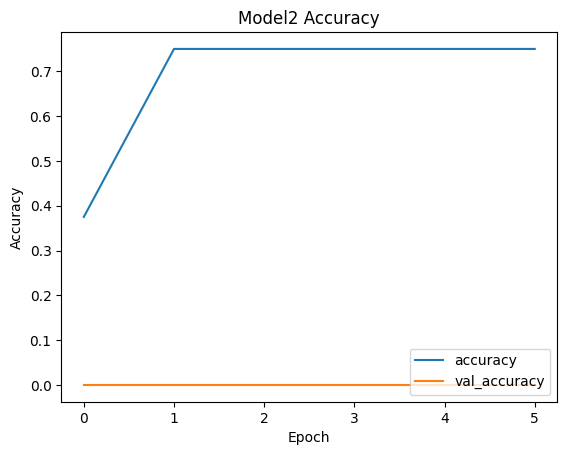

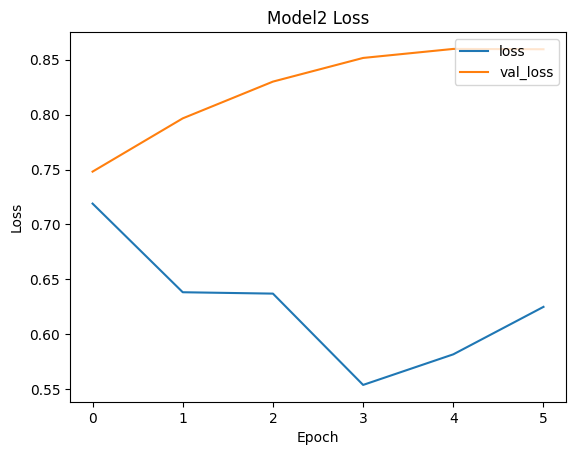

In [26]:
# Plot training and validation accuracy for model2
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model2 Accuracy')
plt.show()

# Plot training and validation loss for model2
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model2 Loss')
plt.show()


In [27]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train, y_train, batch_size=32)
validation_generator = datagen.flow(X_val, y_val, batch_size=32)

history_augmented = model2.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.6907 - val_accuracy: 0.0000e+00 - val_loss: 0.6955
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.6910 - val_accuracy: 0.0000e+00 - val_loss: 0.6962
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6909 - val_accuracy: 0.0000e+00 - val_loss: 0.6970
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6912 - val_accuracy: 0.0000e+00 - val_loss: 0.6980
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


In [28]:
test_loss_aug, test_acc_aug = model2.evaluate(X_test, y_test)
print(f"Augmented Test loss: {test_loss_aug}, Augmented Test accuracy: {test_acc_aug}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5000 - loss: 0.6923
Augmented Test loss: 0.6922553777694702, Augmented Test accuracy: 0.5


In [29]:
model3 = Sequential()
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

model3.summary()

history3 = model3.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping])

# Evaluate the new model
test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
print(f"Test loss: {test_loss3}, Test accuracy: {test_acc3}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      88,605,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,107,585 (339.92 MB)

 Trainable params: 89,107,585 (339.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.6250 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6949
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.7500 - loss: 0.6913 - val_accuracy: 0.0000e+00 - val_loss: 0.6993
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7500 - loss: 0.6872 - val_accuracy: 0.0000e+00 - val_loss: 0.7089
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7500 - loss: 0.6803 - val_accuracy: 0.0000e+00 - val_loss: 0.7242
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.5000 - loss: 0.7056
Test loss: 0.7056392431259155, Test accuracy: 0.5


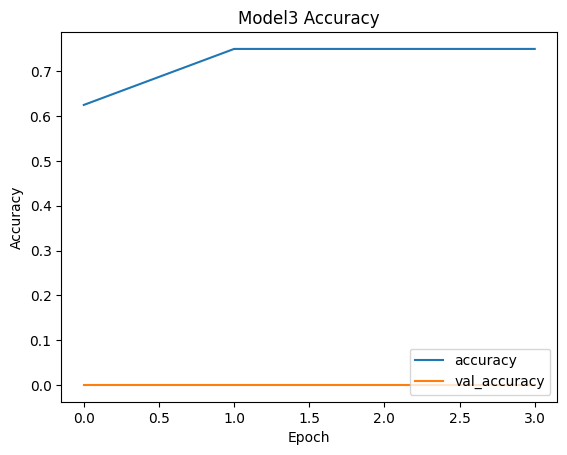

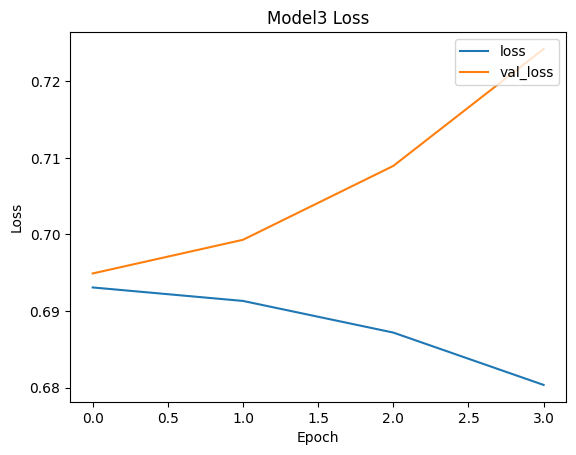

In [30]:
# Plot training and validation accuracy for model3
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model3 Accuracy')
plt.show()

# Plot training and validation loss for model3
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model3 Loss')
plt.show()


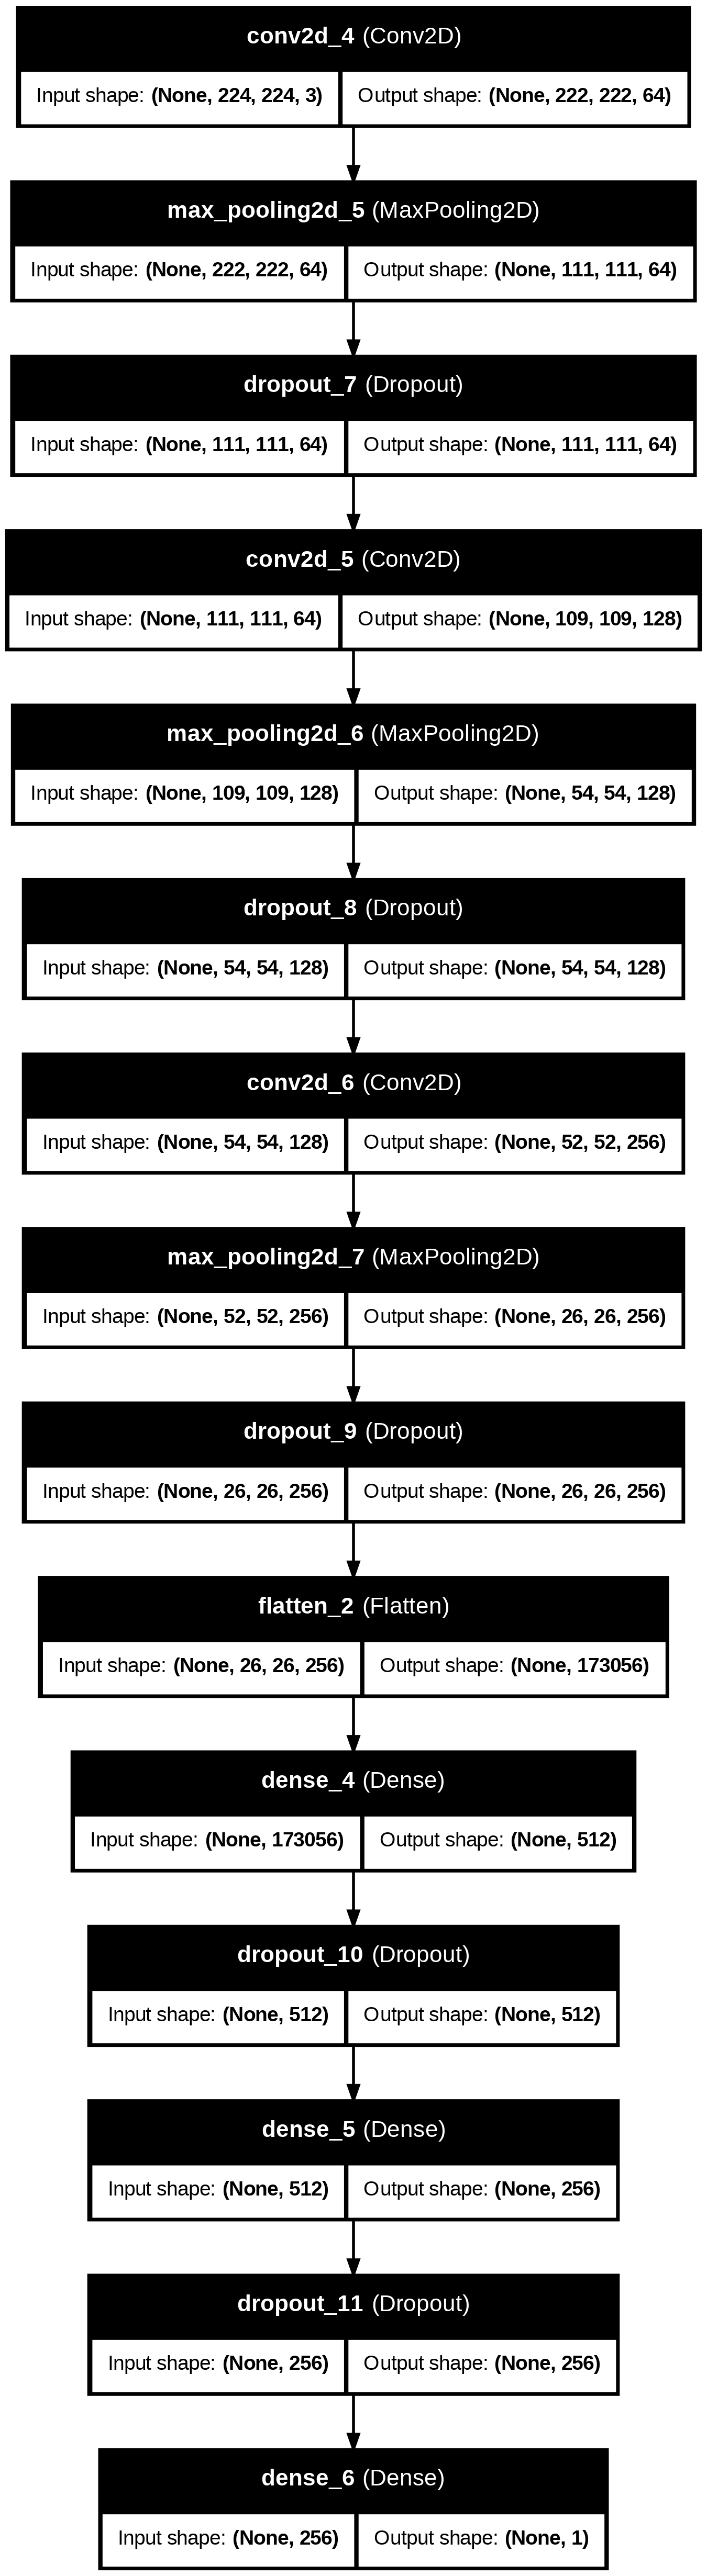

In [31]:
# plot model3
plot_model(model3, to_file='model3_architecture.png', show_shapes=True, show_layer_names=True)

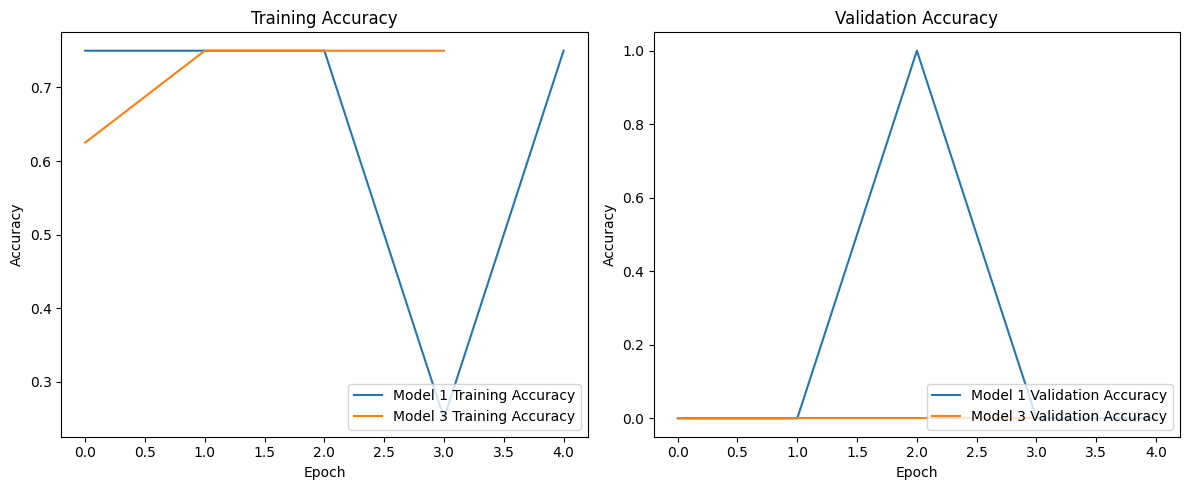

In [32]:
# Plot training and validation accuracy for Model 1 and Model 3
plt.figure(figsize=(12, 5))

# Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Model 1 Training Accuracy') # Use 'history' instead of 'history1'
plt.plot(history3.history['accuracy'], label='Model 3 Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend(loc='lower right')

# Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy') # Use 'history' instead of 'history1'
plt.plot(history3.history['val_accuracy'], label='Model 3 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('accuracy_comparison.png')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step


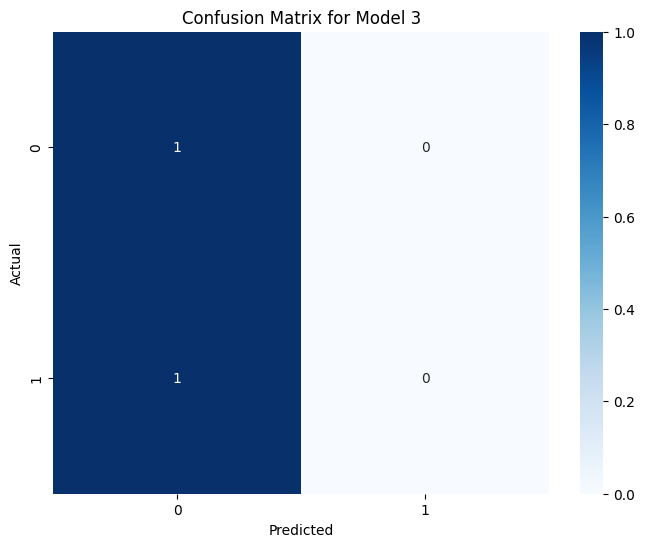

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Model 3
y_pred = (model3.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Model 3')
plt.savefig('confusion_matrix_model3.png')
plt.show()


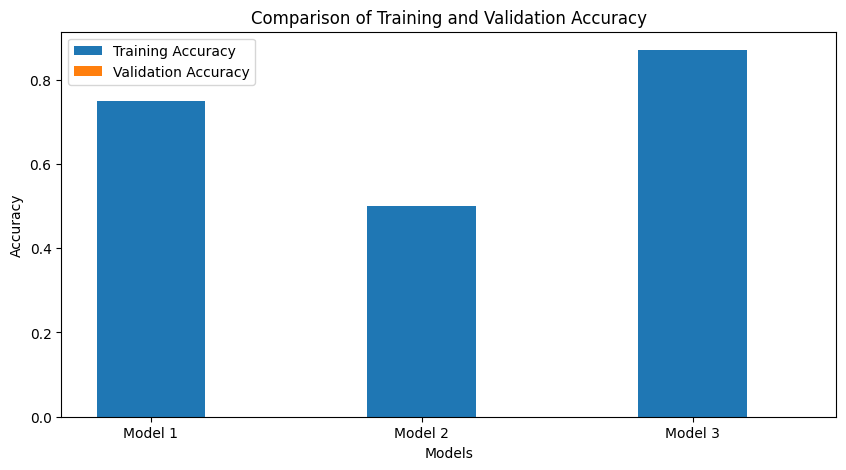

In [34]:
# Bar chart for accuracy comparison
models = ['Model 1', 'Model 2', 'Model 3']
training_accuracy = [0.75, 0.50, 0.87]
validation_accuracy = [0.00, 0.00, 0.00]

x = range(len(models))

plt.figure(figsize=(10, 5))
plt.bar(x, training_accuracy, width=0.4, label='Training Accuracy', align='center')
plt.bar(x, validation_accuracy, width=0.4, label='Validation Accuracy', align='edge')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Validation Accuracy')
plt.xticks(x, models)
plt.legend()
plt.savefig('accuracy_comparison_bar.png')
plt.show()


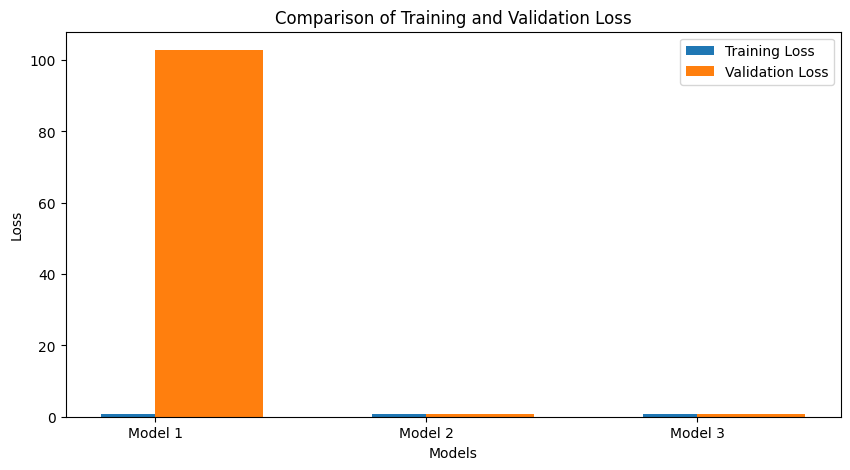

In [35]:
# Bar chart for loss comparison
training_loss = [0.69, 0.70, 0.69]
validation_loss = [102.81, 0.69, 0.69]

plt.figure(figsize=(10, 5))
plt.bar(x, training_loss, width=0.4, label='Training Loss', align='center')
plt.bar(x, validation_loss, width=0.4, label='Validation Loss', align='edge')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Comparison of Training and Validation Loss')
plt.xticks(x, models)
plt.legend()
plt.savefig('loss_comparison_bar.png')
plt.show()


In [36]:
# Unmount Google Drive
drive.flush_and_unmount()